# Installs

In [1]:
# Install R packages
install.packages(c(
  'tscount', 'ggplot2', 'tseries', 'dplyr', 'Metrics',
  'randomForest', 'xgboost', 'caret', 'reshape2', 'forecast',
  'lubridate', 'scales', 'corrplot'
), dependencies=TRUE)

# Load libraries
library(tscount)
library(ggplot2)
library(tseries)
library(dplyr)
library(Metrics)
library(randomForest)
library(xgboost)
library(caret)
library(reshape2)
library(forecast)
library(lubridate)
library(scales)
library(corrplot)
library(tidyr)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“dependency ‘subselect’ is not available”
also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘bitops’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘R.cache’, ‘caTools’, ‘spatstat.data’, ‘spatstat.univar’, ‘spatstat.utils’, ‘deldir’, ‘polyclip’, ‘lazyeval’, ‘checkmate’, ‘wk’, ‘rbibutils’, ‘profileModel’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘plotrix’, ‘diagram’, ‘lava’, ‘styler’, ‘labelled’, ‘gplots’, ‘libcoin’, ‘matrixStats’, ‘permute’, ‘sp’, ‘polyCub’, ‘spatstat.geom’, ‘rex’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’, ‘mvtnorm’, ‘TH.data’, ‘sandwich’, ‘SparseM’, ‘MatrixModels’, ‘classInt’, ‘s2’, ‘units’, ‘xts’, ‘TTR’, ‘profmem’, ‘plogr’, ‘visNetwork’, ‘Rdpack’, ‘cyclocomp’, ‘xmlparsedata’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘brglm’, ‘gtools’, ‘lme4’, ‘qvcalc’, ‘plotmo’, ‘prodlim’, ‘combinat’, ‘questio

# Data Loading

In [2]:
# Download the dataset
download.file(
  url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip",
  destfile = "Bike-Sharing-Dataset.zip",
  mode = "wb"
)

# Unzip the dataset
unzip("Bike-Sharing-Dataset.zip", files = "day.csv", exdir = ".")

In [3]:
# Load the data
df <- read.csv("day.csv")

# Convert 'dteday' to Date type
df$dteday <- as.Date(df$dteday)

# Display the first few rows
print("First 5 rows of the dataset:")
head(df, 5)

[1] "First 5 rows of the dataset:"


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<date>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Data Exploration

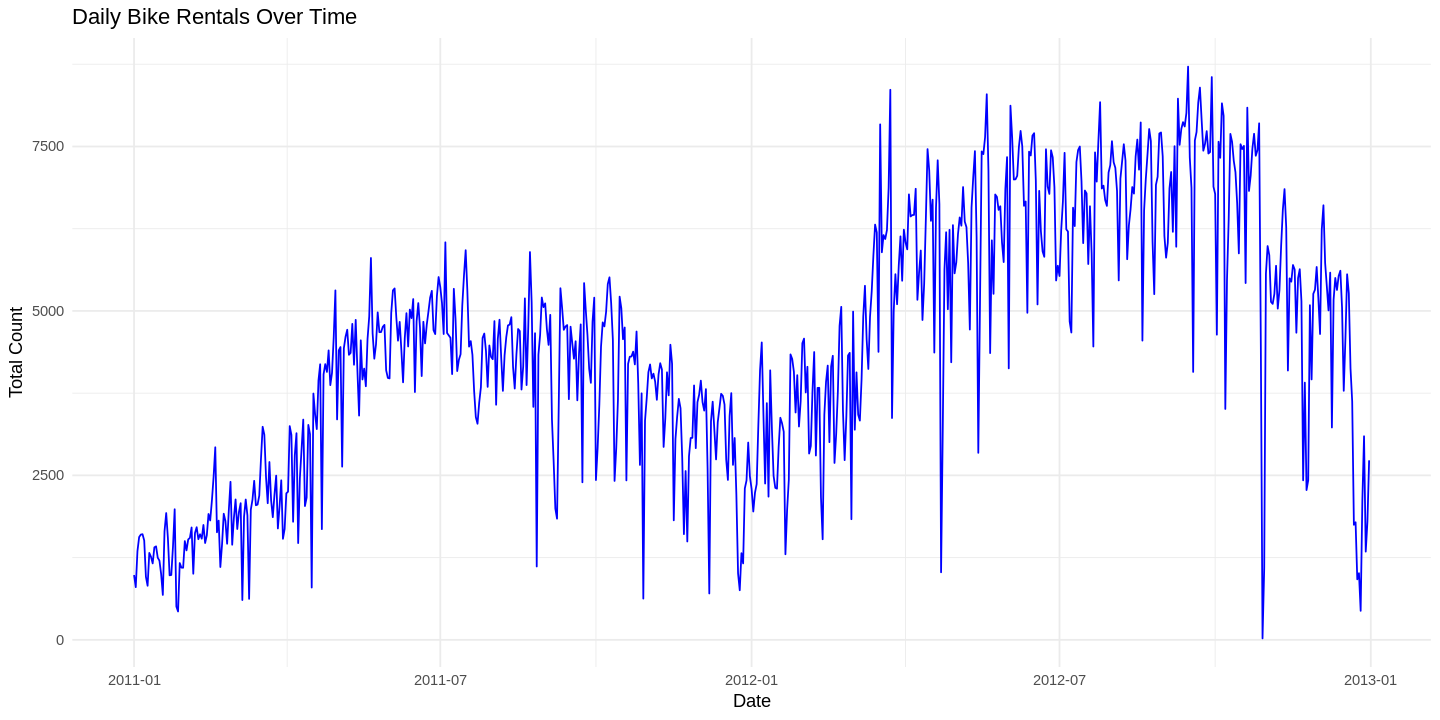

In [4]:
# Plot the count of bike rentals over time
options(repr.plot.width=12, repr.plot.height=6)
ggplot(df, aes(x = dteday, y = cnt)) +
  geom_line(color = 'blue') +
  labs(title = 'Daily Bike Rentals Over Time', x = 'Date', y = 'Total Count') +
  theme_minimal()

In [5]:
# Perform ADF test
adf_result <- adf.test(df$cnt, alternative = "stationary")

print("ADF Test on Entire Dataset:")
print(adf_result)

if(adf_result$p.value < 0.05){
  print("The series is stationary.")
} else{
  print("The series is non-stationary.")
}

[1] "ADF Test on Entire Dataset:"

	Augmented Dickey-Fuller Test

data:  df$cnt
Dickey-Fuller = -1.6351, Lag order = 9, p-value = 0.7327
alternative hypothesis: stationary

[1] "The series is non-stationary."


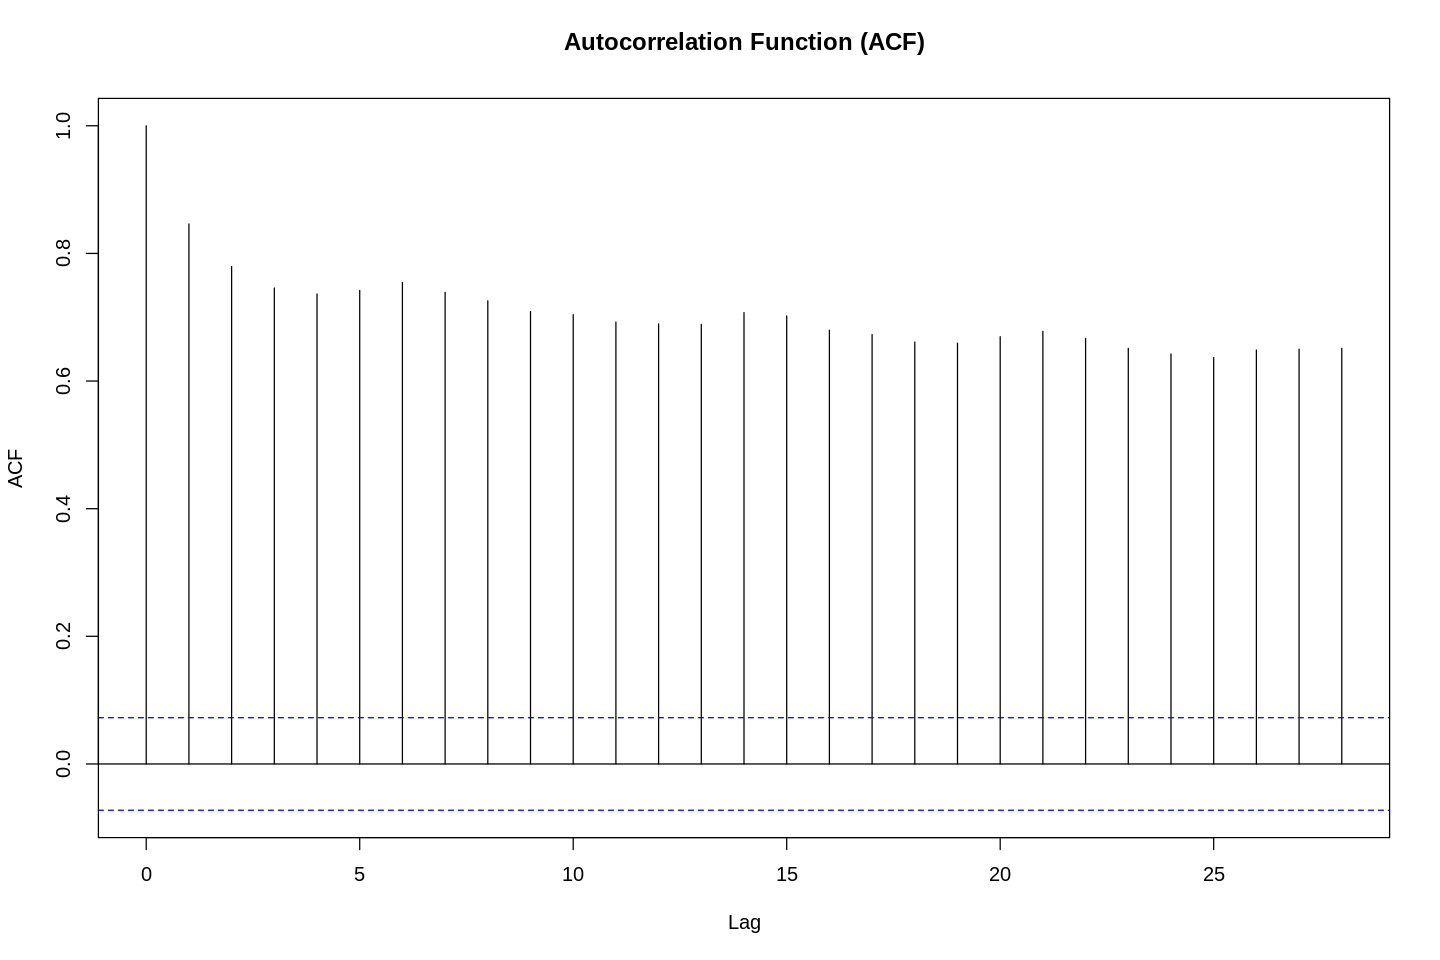

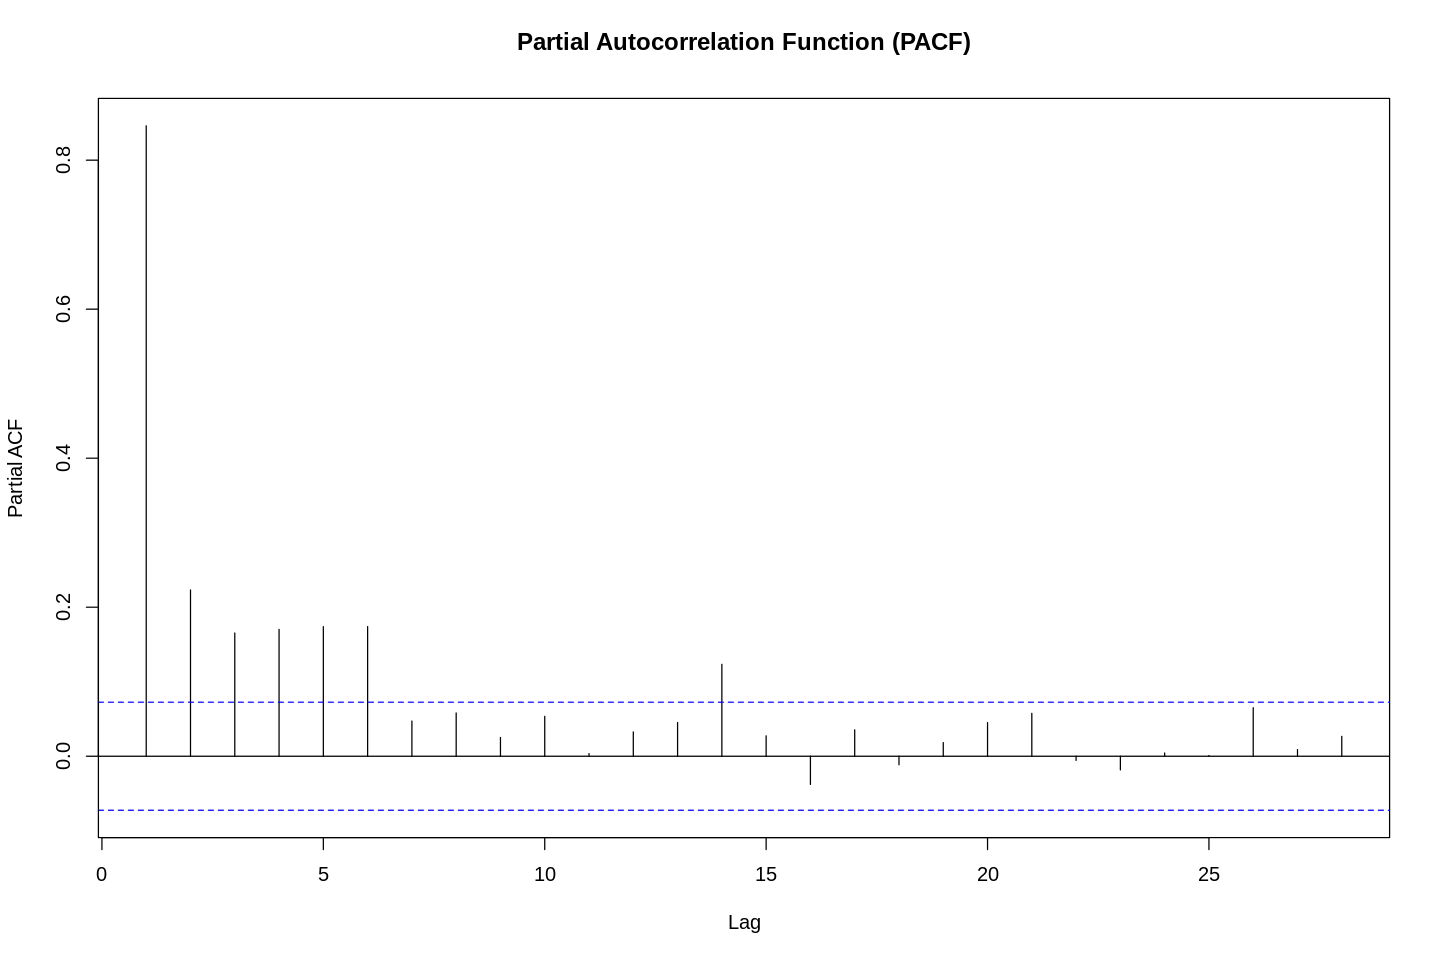

In [6]:
# Plot ACF
options(repr.plot.width=12, repr.plot.height=8)
acf(df$cnt, main = "Autocorrelation Function (ACF)")

# Plot PACF
pacf(df$cnt, main = "Partial Autocorrelation Function (PACF)")

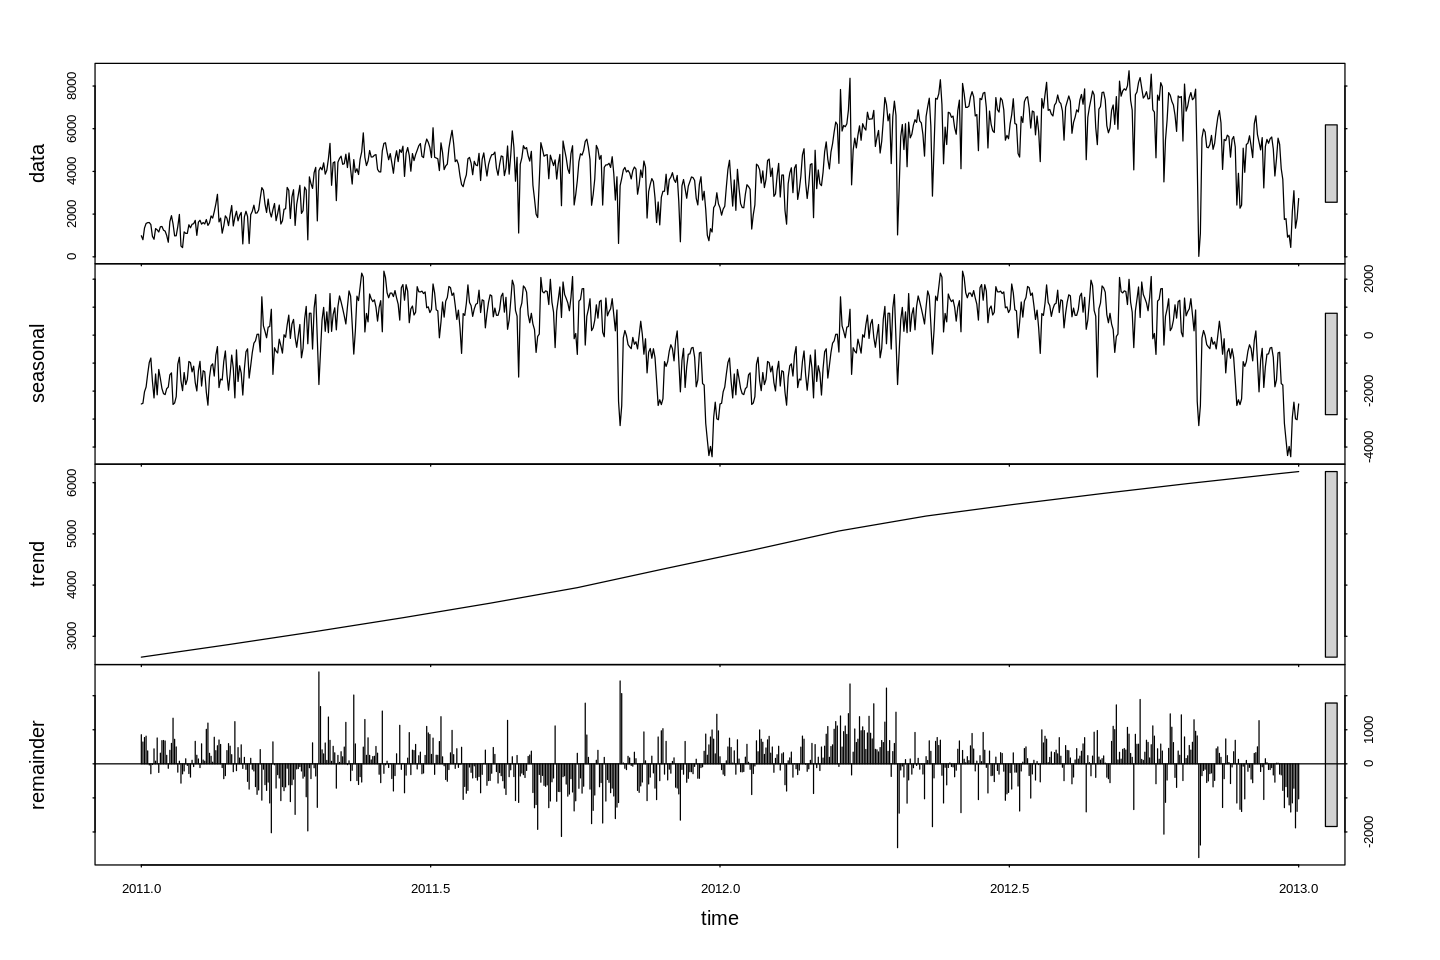

In [7]:
# Convert to time series object
cnt_ts <- ts(df$cnt, frequency = 365, start = c(year(df$dteday[1]), yday(df$dteday[1])))

# Decompose the time series
decomposed <- stl(cnt_ts, s.window = "periodic")

# Plot the decomposed components
options(repr.plot.width=12, repr.plot.height=8)
plot(decomposed)

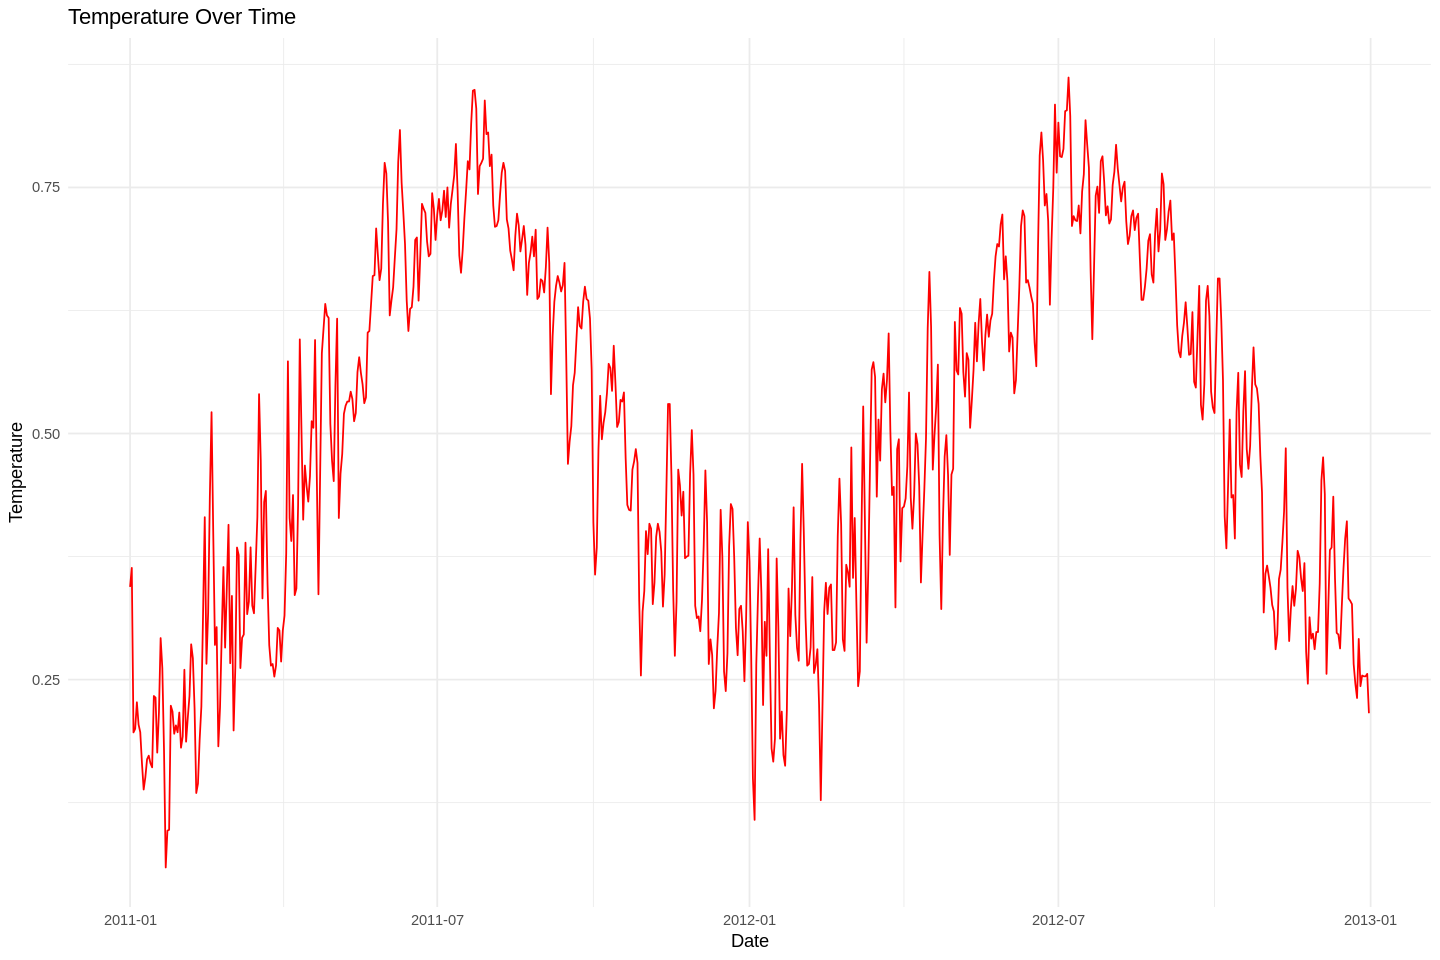

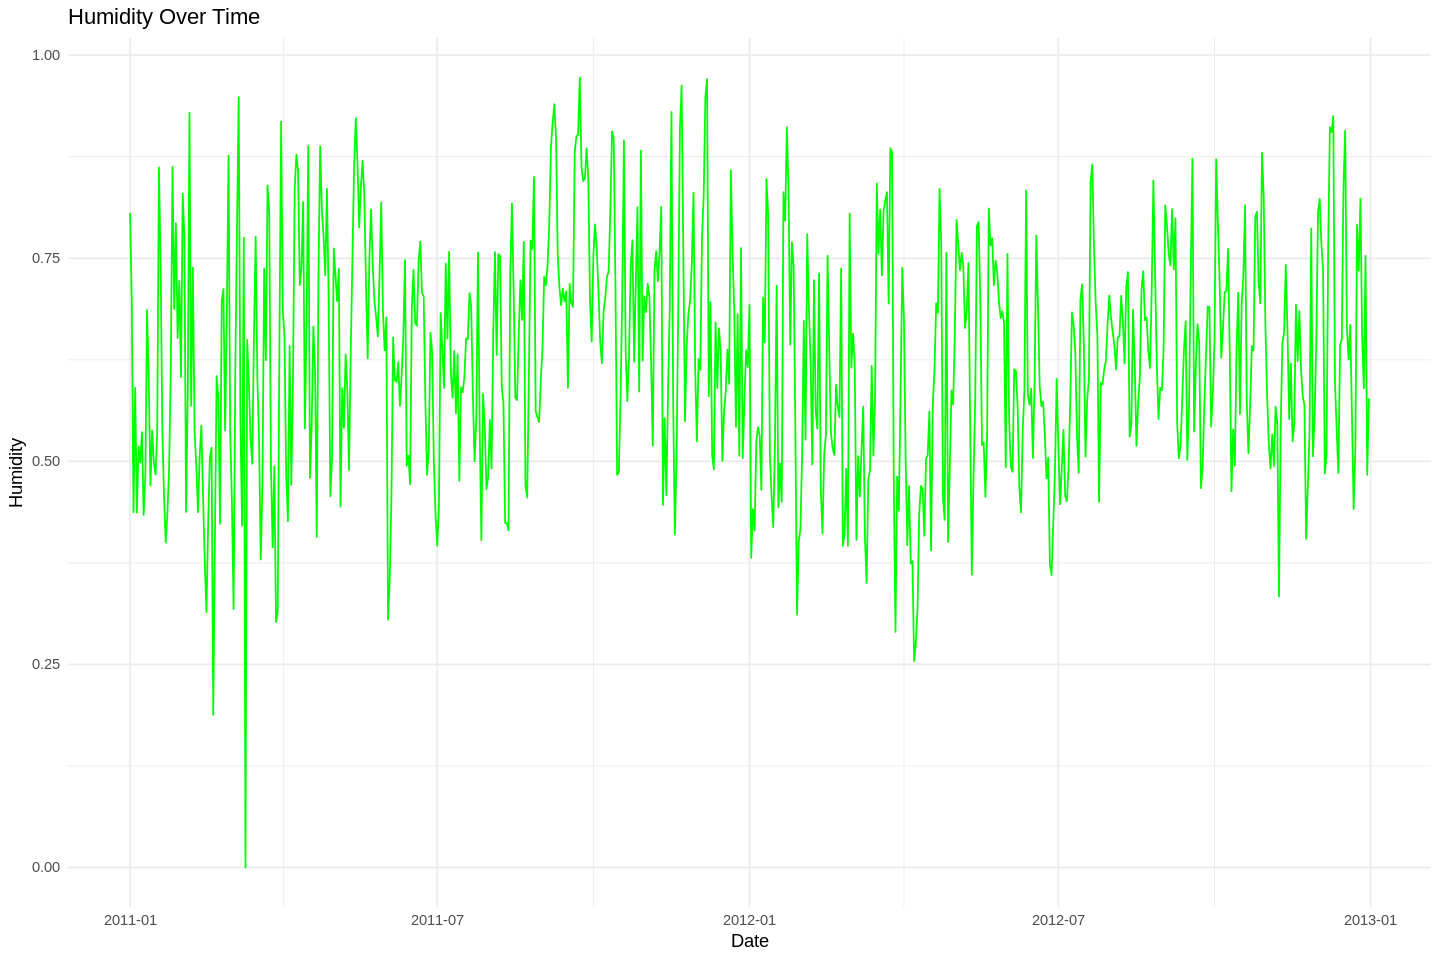

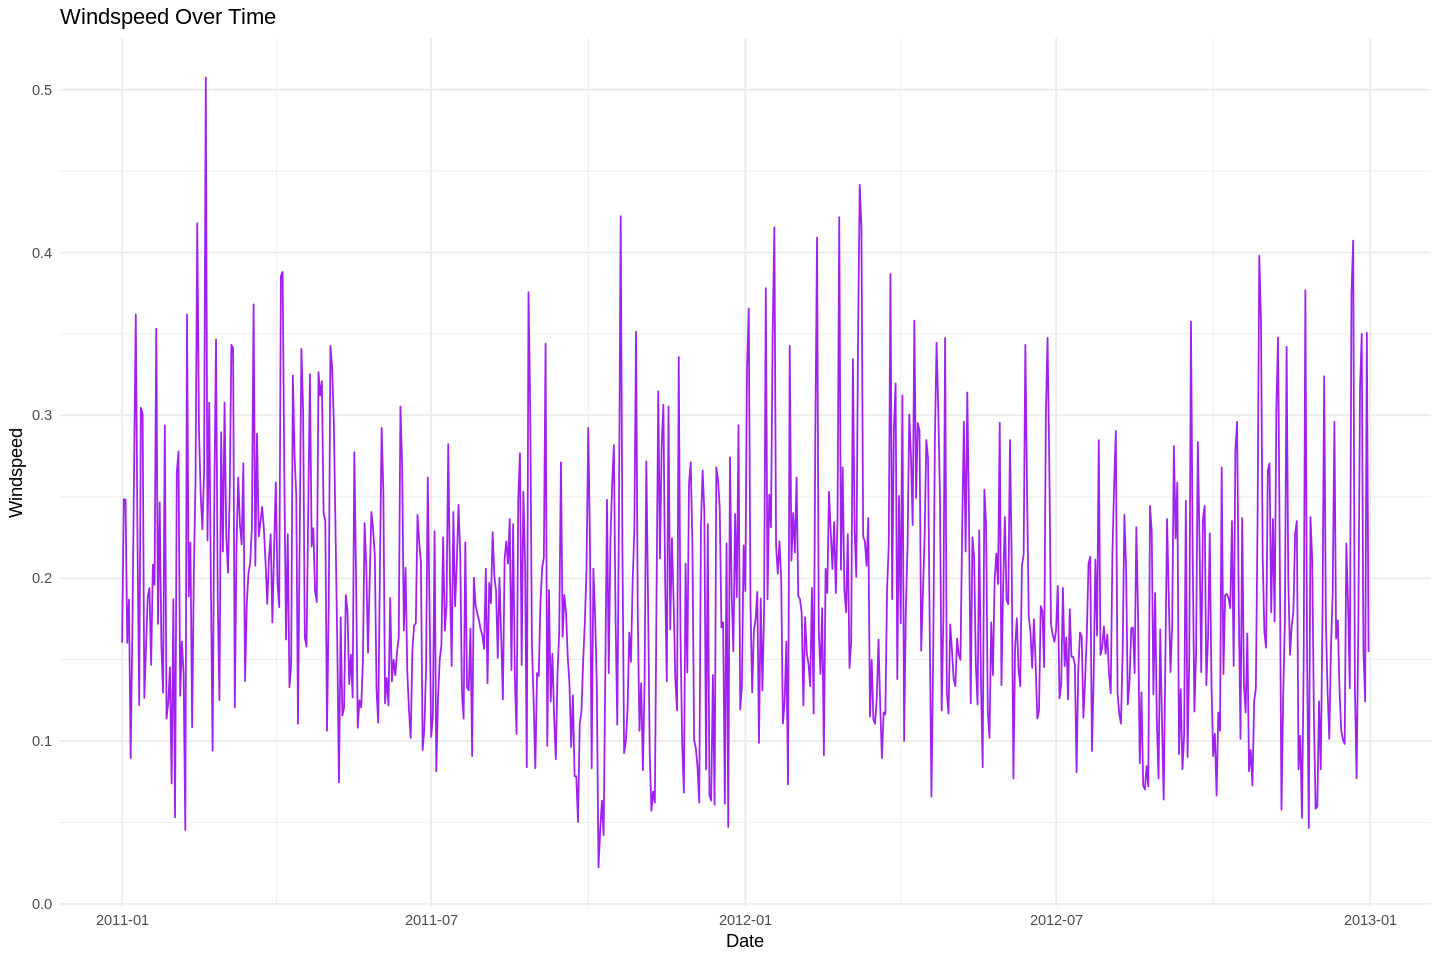

In [8]:
# Plot temperature over time
ggplot(df, aes(x = dteday, y = temp)) +
  geom_line(color = 'red') +
  labs(title = 'Temperature Over Time', x = 'Date', y = 'Temperature') +
  theme_minimal()

# Plot humidity over time
ggplot(df, aes(x = dteday, y = hum)) +
  geom_line(color = 'green') +
  labs(title = 'Humidity Over Time', x = 'Date', y = 'Humidity') +
  theme_minimal()

# Plot windspeed over time
ggplot(df, aes(x = dteday, y = windspeed)) +
  geom_line(color = 'purple') +
  labs(title = 'Windspeed Over Time', x = 'Date', y = 'Windspeed') +
  theme_minimal()

[1] "Correlation Matrix:"
                 cnt       temp      atemp        hum  windspeed
cnt        1.0000000  0.6274940  0.6310657 -0.1006586 -0.2345450
temp       0.6274940  1.0000000  0.9917016  0.1269629 -0.1579441
atemp      0.6310657  0.9917016  1.0000000  0.1399881 -0.1836430
hum       -0.1006586  0.1269629  0.1399881  1.0000000 -0.2484891
windspeed -0.2345450 -0.1579441 -0.1836430 -0.2484891  1.0000000


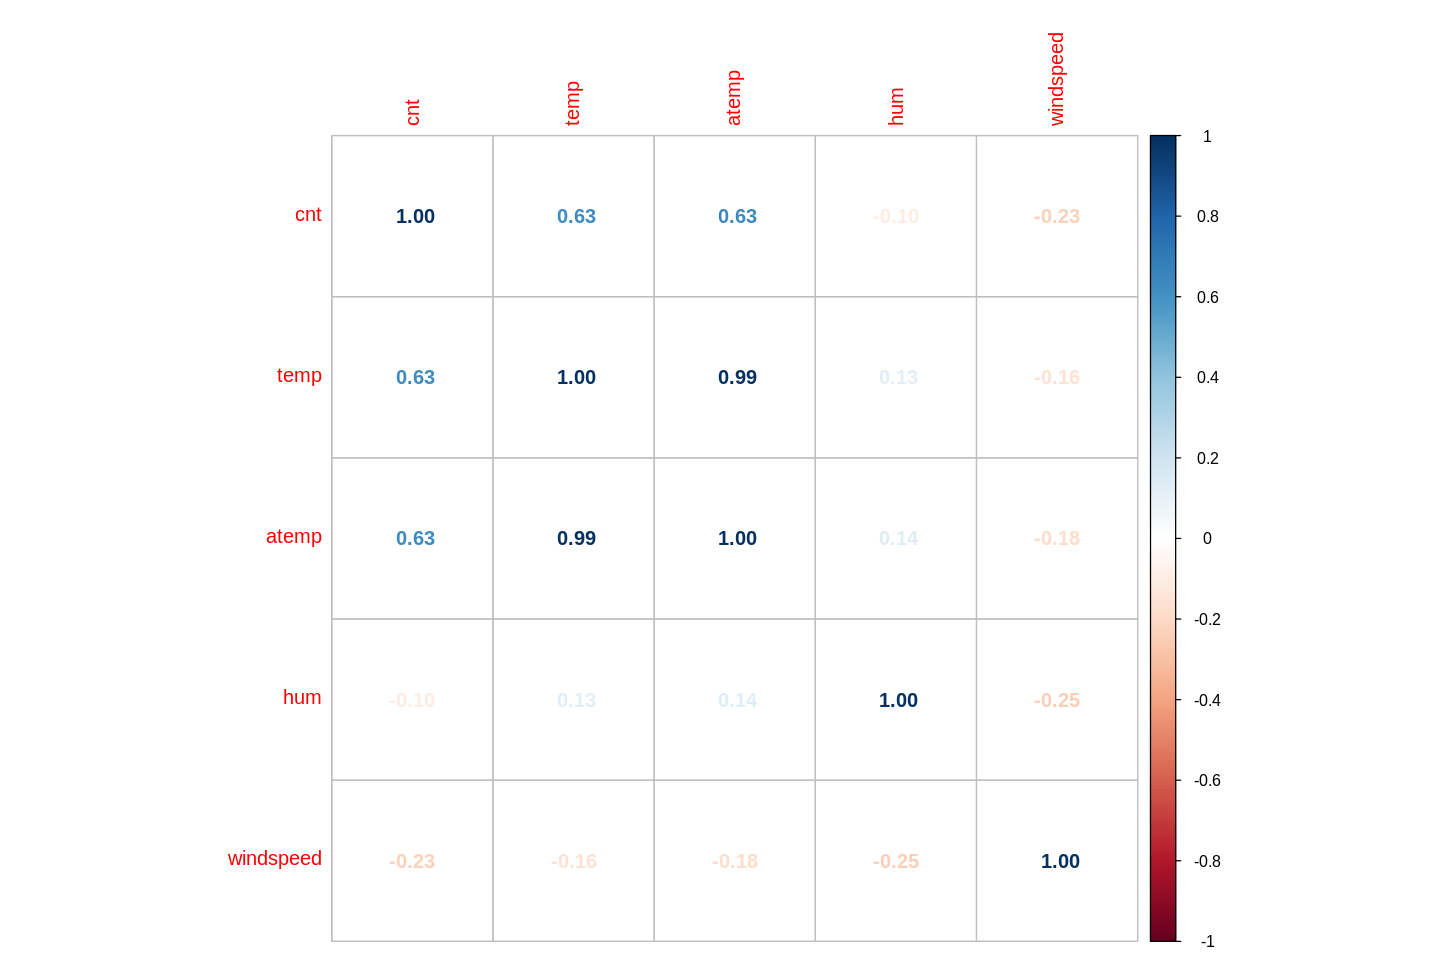

In [9]:
# Select relevant variables
vars <- c('cnt', 'temp', 'atemp', 'hum', 'windspeed')

# Compute correlation matrix
cor_matrix <- cor(df[, vars])

print("Correlation Matrix:")
print(cor_matrix)

# Visualize correlation matrix
corrplot::corrplot(cor_matrix, method = "number")

# Data Preparation

In [10]:
# Create time index
df$time_index <- 1:nrow(df)

# Create harmonic terms for weekly seasonality
df$sin_week <- sin(2 * pi * df$time_index / 7)
df$cos_week <- cos(2 * pi * df$time_index / 7)

# Create harmonic terms for yearly seasonality
df$sin_year <- sin(2 * pi * df$time_index / 365)
df$cos_year <- cos(2 * pi * df$time_index / 365)

# Display the updated dataframe
print("Data after adding time index and harmonic terms:")
head(df[, c("dteday", "cnt", "time_index", "sin_week", "cos_week", "sin_year", "cos_year")], 5)

[1] "Data after adding time index and harmonic terms:"


,dteday,cnt,time_index,sin_week,cos_week,sin_year,cos_year
,<date>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,985,1,0.7818315,0.6234898,0.01721336,0.9998518
2,2011-01-02,801,2,0.9749279,-0.2225209,0.03442161,0.9994074
3,2011-01-03,1349,3,0.4338837,-0.9009689,0.05161967,0.9986668
4,2011-01-04,1562,4,-0.4338837,-0.9009689,0.06880243,0.9976303
5,2011-01-05,1600,5,-0.9749279,-0.2225209,0.08596480,0.9962982


In [11]:
# Define the maximum lag
max_lag <- 7  # Use last 7 days to predict the next day

# Create lag features for 'cnt'
create_lag_features <- function(data, max_lag){
  for(lag in 1:max_lag){
    data <- data %>%
      mutate(!!paste0("lag_", lag) := lag(cnt, lag))
  }
  return(data)
}

# Apply the function to create lag features
df <- create_lag_features(df, max_lag)

# Drop rows with NA values resulting from lagging
df <- df %>% drop_na()

# Display the updated dataframe
print("Data after creating lag features:")
head(df[, c("dteday", "cnt", paste0("lag_", 1:max_lag))], 5)

[1] "Data after creating lag features:"


,dteday,cnt,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
,<date>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2011-01-08,959,1510,1606,1600,1562,1349,801,985
2,2011-01-09,822,959,1510,1606,1600,1562,1349,801
3,2011-01-10,1321,822,959,1510,1606,1600,1562,1349
4,2011-01-11,1263,1321,822,959,1510,1606,1600,1562
5,2011-01-12,1162,1263,1321,822,959,1510,1606,1600


In [12]:
# Determine the index to split the data (80% train, 20% test)
split_index <- floor(0.8 * nrow(df))

# Split the data
train <- df[1:split_index, ]
test <- df[(split_index + 1):nrow(df), ]

print(paste("Training set size:", nrow(train)))
print(paste("Test set size:", nrow(test)))

[1] "Training set size: 579"
[1] "Test set size: 145"


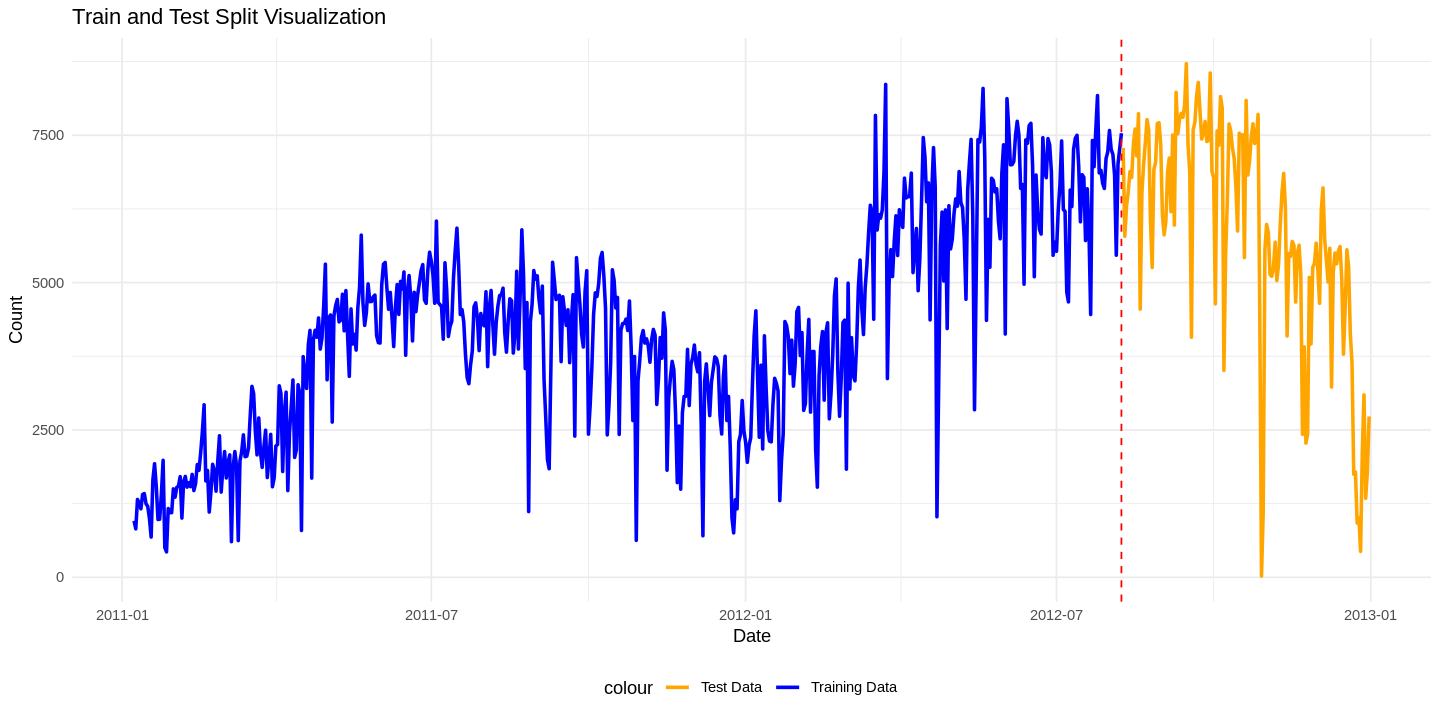

In [13]:
# Visualize the train/test split
options(repr.plot.width=12, repr.plot.height=6)
ggplot() +
  geom_line(data = train, aes(x = dteday, y = cnt, color = "Training Data"), linewidth = 1) +
  geom_line(data = test, aes(x = dteday, y = cnt, color = "Test Data"), linewidth = 1) +
  geom_vline(xintercept = as.numeric(train$dteday[nrow(train)]), color = 'red', linetype = "dashed") +
  labs(title = 'Train and Test Split Visualization', x = 'Date', y = 'Count') +
  theme_minimal() +
  scale_color_manual(values = c("Training Data" = "blue", "Test Data" = "orange")) +
  theme(legend.position = "bottom")

# Model Fitting

In [14]:
# Exogenous variables
exog_vars <- c('temp', 'hum', 'windspeed', 'holiday', 'time_index',
               'sin_week', 'cos_week', 'sin_year', 'cos_year')

# If 'holiday' is a factor, convert it to numeric
train$holiday <- as.numeric(as.character(train$holiday))
test$holiday <- as.numeric(as.character(test$holiday))

# Extract exogenous variables for training and testing
exog_vars_train <- as.matrix(train[, exog_vars])
exog_vars_test <- as.matrix(test[, exog_vars])

In [15]:
# Prepare time series data for tscount
train_counts <- train$cnt
test_counts <- test$cnt

# Include lagged counts up to max_lag
past_obs_lags <- 1:max_lag

# Include past mean to model seasonality
past_mean_lags <- c(7, 365)

In [16]:
# Poisson Model
poisson_model <- tsglm(
  train_counts,
  link = "log",
  model = list(past_obs = past_obs_lags, past_mean = past_mean_lags),
  xreg = exog_vars_train,
  distr = "poisson"
)

# Negative Binomial Model
nb_model <- tsglm(
  train_counts,
  link = "log",
  model = list(past_obs = past_obs_lags, past_mean = past_mean_lags),
  xreg = exog_vars_train,
  distr = "nbinom"
)

In [17]:
# Summaries of the models
print("Poisson Model Summary:")
summary(poisson_model)

print("Negative Binomial Model Summary:")
summary(nb_model)

[1] "Poisson Model Summary:"



Call:
tsglm(ts = train_counts, model = list(past_obs = past_obs_lags, 
    past_mean = past_mean_lags), xreg = exog_vars_train, link = "log", 
    distr = "poisson")

Coefficients:
              Estimate  Std.Error  CI(lower)  CI(upper)
(Intercept)   4.733179   6.33e-02   4.609143    4.85722
beta_1        0.246416   2.81e-03   0.240907    0.25193
beta_2        0.066723   2.73e-03   0.061367    0.07208
beta_3        0.039950   2.61e-03   0.034837    0.04506
beta_4        0.058062   2.60e-03   0.052961    0.06316
beta_5        0.003605   2.59e-03  -0.001475    0.00869
beta_6        0.114334   2.66e-03   0.109123    0.11954
beta_7        0.007928   2.88e-03   0.002279    0.01358
alpha_7      -0.016622   5.26e-03  -0.026932   -0.00631
alpha_365    -0.103178   3.57e-03  -0.110183   -0.09617
temp          0.630879   9.38e-03   0.612502    0.64926
hum          -0.444306   4.88e-03  -0.453869   -0.43474
windspeed    -0.739567   9.50e-03  -0.758178   -0.72096
holiday      -0.102555   4.28e-03 

[1] "Negative Binomial Model Summary:"



Call:
tsglm(ts = train_counts, model = list(past_obs = past_obs_lags, 
    past_mean = past_mean_lags), xreg = exog_vars_train, link = "log", 
    distr = "nbinom")

Coefficients:
              Estimate  Std.Error  CI(lower)  CI(upper)
(Intercept)   4.733179    0.85293   3.061468   6.404889
beta_1        0.246416    0.03603   0.175793   0.317039
beta_2        0.066723    0.03623  -0.004290   0.137736
beta_3        0.039950    0.03582  -0.030247   0.110147
beta_4        0.058062    0.03563  -0.011781   0.127905
beta_5        0.003605    0.03568  -0.066328   0.073539
beta_6        0.114334    0.03575   0.044259   0.184409
beta_7        0.007928    0.03971  -0.069897   0.085752
alpha_7      -0.016622    0.07433  -0.162308   0.129063
alpha_365    -0.103178    0.04814  -0.197524  -0.008831
temp          0.630879    0.13468   0.366910   0.894848
hum          -0.444306    0.06995  -0.581408  -0.307204
windspeed    -0.739567    0.13461  -1.003390  -0.475745
holiday      -0.102555    0.06017  

In [18]:
# Convert 'holiday' to a factor for Random Forest
train_rf <- train
test_rf <- test
train_rf$holiday <- as.factor(train_rf$holiday)
test_rf$holiday <- as.factor(test_rf$holiday)

# Prepare features
feature_cols <- c(paste0("lag_", 1:max_lag), exog_vars)

In [19]:
# Features and target for Random Forest
X_train_rf <- train_rf[, feature_cols]
y_train_rf <- train_rf$cnt

X_test_rf <- test_rf[, feature_cols]
y_test_rf <- test_rf$cnt

In [20]:
# Features and target for XGBoost
X_train_xgb <- train[, feature_cols]
y_train_xgb <- train$cnt

X_test_xgb <- test[, feature_cols]
y_test_xgb <- test$cnt

In [21]:
# Random Forest Model
set.seed(42)
rf_model <- randomForest(x = X_train_rf, y = y_train_rf, ntree = 100)

# Convert data to matrix format for XGBoost
dtrain_xgb <- xgb.DMatrix(data = as.matrix(X_train_xgb), label = y_train_xgb)
dtest_xgb <- xgb.DMatrix(data = as.matrix(X_test_xgb), label = y_test_xgb)

# XGBoost parameters
xgb_params <- list(
  objective = "reg:squarederror",
  eval_metric = "rmse"
)

# XGBoost Model
set.seed(42)
xgb_model <- xgboost(params = xgb_params, data = dtrain_xgb, nrounds = 100, verbose = 0)

In [22]:
# Poisson Model Predictions
poisson_pred <- predict(poisson_model, n.ahead = nrow(test), newxreg = exog_vars_test)$pred

# Negative Binomial Model Predictions
nb_pred <- predict(nb_model, n.ahead = nrow(test), newxreg = exog_vars_test)$pred

# Random Forest Predictions
rf_pred <- predict(rf_model, newdata = X_test_rf)

# XGBoost Predictions
xgb_pred <- predict(xgb_model, dtest_xgb)

# Ensure non-negative predictions
poisson_pred <- pmax(0, poisson_pred)
nb_pred <- pmax(0, nb_pred)
rf_pred <- pmax(0, rf_pred)
xgb_pred <- pmax(0, xgb_pred)

# Model Evaluation

In [23]:
# Calculate metrics
metrics <- data.frame(
  Model = c("Poisson", "Negative Binomial", "Random Forest", "XGBoost"),
  MSE = c(
    mse(test$cnt, poisson_pred),
    mse(test$cnt, nb_pred),
    mse(test$cnt, rf_pred),
    mse(test$cnt, xgb_pred)
  ),
  RMSE = c(
    rmse(test$cnt, poisson_pred),
    rmse(test$cnt, nb_pred),
    rmse(test$cnt, rf_pred),
    rmse(test$cnt, xgb_pred)
  ),
  MAE = c(
    mae(test$cnt, poisson_pred),
    mae(test$cnt, nb_pred),
    mae(test$cnt, rf_pred),
    mae(test$cnt, xgb_pred)
  ),
  MAPE = c(
    mape(test$cnt, poisson_pred),
    mape(test$cnt, nb_pred),
    mape(test$cnt, rf_pred),
    mape(test$cnt, xgb_pred)
  )
)

print("Model Evaluation Metrics:")
print(metrics)

[1] "Model Evaluation Metrics:"
              Model     MSE     RMSE       MAE     MAPE
1           Poisson 2116224 1454.725 1123.1561 1.695841
2 Negative Binomial 2116224 1454.725 1123.1561 1.695841
3     Random Forest 1346043 1160.191  832.3659 1.869942
4           XGBoost 1576749 1255.687  894.6468 1.259593


In [24]:
# Extract information criteria for tscount models
info_criteria <- data.frame(
  Model = c("Poisson", "Negative Binomial"),
  AIC = c(AIC(poisson_model), AIC(nb_model)),
  BIC = c(BIC(poisson_model), BIC(nb_model))
)

print("Information Criteria Metrics for Statistical Models:")
print(info_criteria)

[1] "Information Criteria Metrics for Statistical Models:"
              Model       AIC        BIC
1           Poisson 101495.03 101577.896
2 Negative Binomial   9564.23   9651.456


In [25]:
# Create a dataframe for plotting
plot_df <- data.frame(
  Date = test$dteday,
  Actual = test$cnt,
  Poisson = poisson_pred,
  Negative_Binomial = nb_pred,
  Random_Forest = rf_pred,
  XGBoost = xgb_pred
)

head(plot_df)

,Date,Actual,Poisson,Negative_Binomial,Random_Forest,XGBoost
,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,2012-08-09,7286,7432.482,7432.482,7254.816,7050.425
2,2012-08-10,5786,6552.455,6552.455,6835.029,5564.746
3,2012-08-11,6299,6149.528,6149.528,6283.126,6047.426
4,2012-08-12,6544,7343.889,7343.889,6618.843,7131.589
5,2012-08-13,6883,7662.218,7662.218,6900.508,6854.918
6,2012-08-14,6784,7197.981,7197.981,7032.045,7180.941


In [26]:
# Melt the dataframe for ggplot
plot_df_melt <- melt(plot_df, id.vars = 'Date', variable.name = 'Model', value.name = 'Count')

# Assign colors for each model
model_colors <- c(
  "Actual" = "black",
  "Negative_Binomial" = "skyblue",
  "Random_Forest" = "green",
  "XGBoost" = "magenta"
)

In [27]:
# Check if the tscount model predictions are identical
if (all(poisson_pred == nb_pred)) {
  print("Poisson and Negative Binomial model predictions are identical.")
} else {
  print("Poisson and Negative Binomial model predictions are different.")
}

[1] "Poisson and Negative Binomial model predictions are identical."


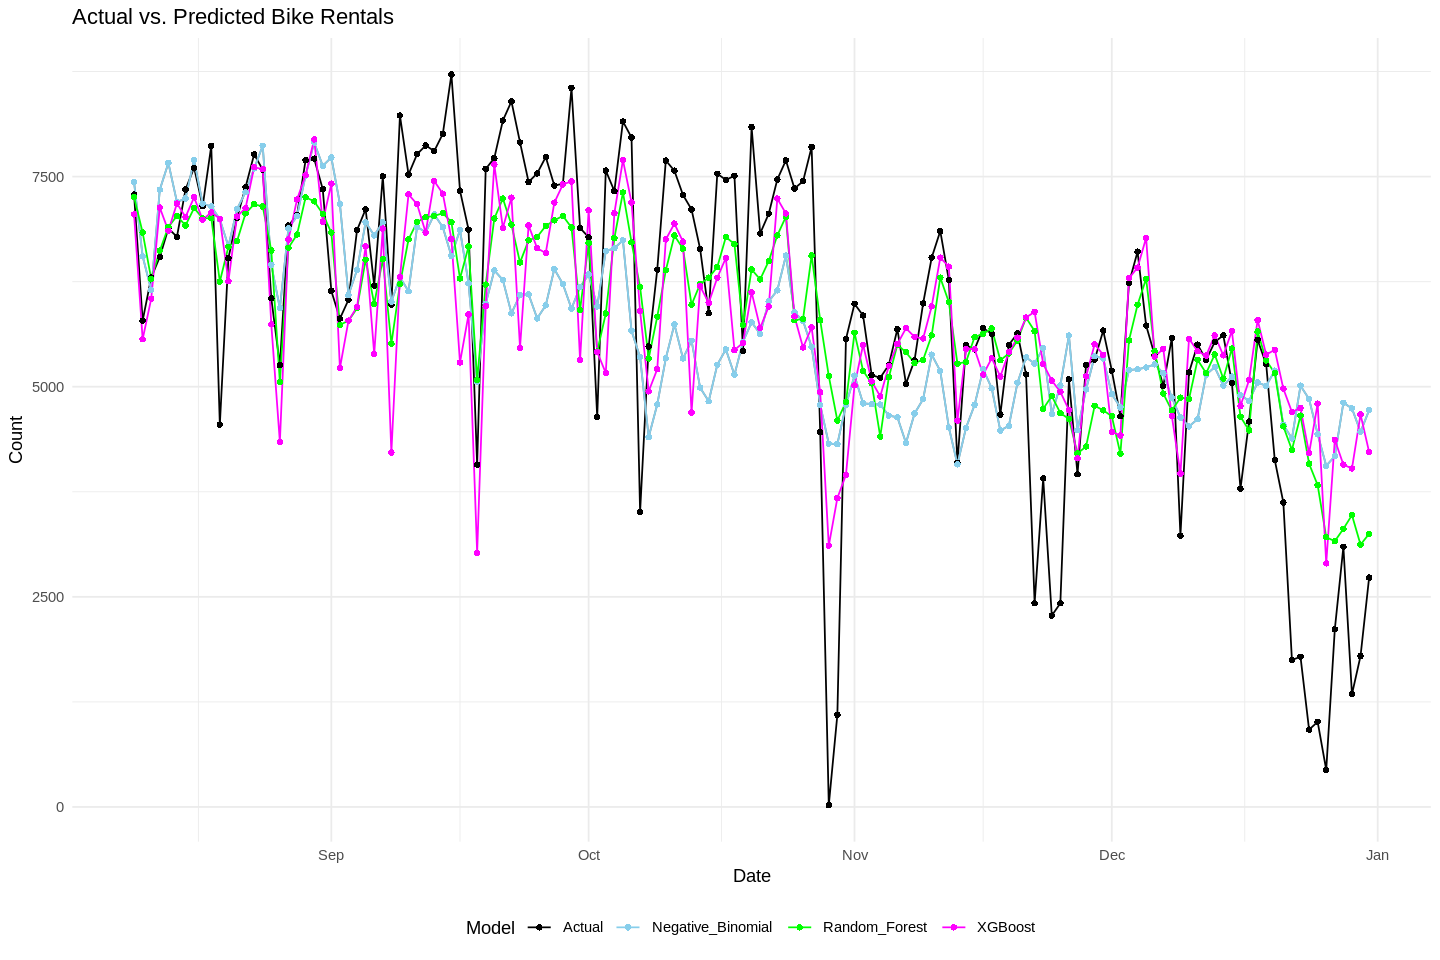

In [28]:
# Plot actual versus predicted values
options(repr.plot.width=12, repr.plot.height=8)
ggplot(plot_df_melt, aes(x = Date, y = Count, color = Model)) +
  geom_line() +
  geom_point(size = 1.5, shape = 16) +
  labs(title = 'Actual vs. Predicted Bike Rentals', x = 'Date', y = 'Count') +
  theme_minimal() +
  theme(legend.position = "bottom") +
  scale_color_manual(values = model_colors)